In [2]:
import PyPDF2
import nltk
import re
import numpy as np
from PyPDF2 import PdfFileWriter, PdfFileReader
from nltk import sent_tokenize,word_tokenize
from nltk.tokenize  import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.probability import FreqDist
from string import punctuation
from nltk.corpus import stopwords
from nltk.text import Text
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing of regulation pdf
text=PdfFileReader(open(r"C:\Users\admin\Desktop\my_Stuff\srikanth\BBCylance_LC_Q319_Threat_Report.pdf",'rb'))

In [4]:
# function to extract text from all pages
def story(x):
    page=[]
    for i in  range(0,x.numPages):
        pages=x.getPage(i) 
        story=pages.extractText() 
        k= ' '.join (story.split())
        page.append(k)
    return page

In [5]:
# removing special symbols
def remove_spl(data):
    new=[]
    for i in range(text.numPages):
        #print(i)
        p=re.sub('[ﬁ,ﬂ]',' ',data[i])
        #print(p)
        #p=re.sub('[;,:]','.',data[i])
        new.append(p)
    return(new)

In [6]:
raw=story(text)
raw=remove_spl(raw)

In [203]:
sent=([sent for sent in sent_tokenize(str(raw))])
for j in range(text.numPages):
    k='Bureau of Cannabis Control Regular Regulations Text Page' + ' '+ str(j) +' '+'of' + ' '+'136'
    for i in range(len(sent)):                    
        if k in sent[i]:
            sent[i]= sent[i].replace(k,' ') 

In [226]:
sent

["['  BUREAU OF CANNABIS CONTROL PROPOSED TEXT OF REGULATIONS CALIFORNIA CODE OF REGULATIONS TITLE 16 DIVISION 42.",
 'BUREAU OF CANNABIS CONTROL All of the proposed text sections and documents incorporated by reference are proposed to be added to the California Code of Regulation s under Division 42 of Title 16: Chapter 1.',
 'ALL BUREAU LICENSEES Article 1.',
 'Division Definitions § 5000.',
 'Definitions For the purposes of this division  the definitions in this section shall govern the construction of this division unless otherwise indicated.',
 '(a)  Act  means the Medicinal and Adult -Use Cannabis Regulation and Safety Act.',
 '(b)  Bureau  means the Bureau of Cannabis Control  previously named the B ureau of Marijuana Control  Bureau of Medical Cannabis Regulation  and Bureau of Medical Marijuana Regulation.',
 '(c)  Cannabis accessories  has the same meaning as in Health and Safety Code s ection 11018.2.',
 '(d)  Cannabis goods  means cannabis  including drie d flower  and prod

In [223]:
c1=[]
for i in range(len(sent)):
    if 'Chapter 2.' not in sent[i]:
        a=sent[i]
        c1.append(a)
    else: 
        break

In [227]:
c1

["['  BUREAU OF CANNABIS CONTROL PROPOSED TEXT OF REGULATIONS CALIFORNIA CODE OF REGULATIONS TITLE 16 DIVISION 42.",
 'BUREAU OF CANNABIS CONTROL All of the proposed text sections and documents incorporated by reference are proposed to be added to the California Code of Regulation s under Division 42 of Title 16: Chapter 1.',
 'ALL BUREAU LICENSEES Article 1.',
 'Division Definitions § 5000.',
 'Definitions For the purposes of this division  the definitions in this section shall govern the construction of this division unless otherwise indicated.',
 '(a)  Act  means the Medicinal and Adult -Use Cannabis Regulation and Safety Act.',
 '(b)  Bureau  means the Bureau of Cannabis Control  previously named the B ureau of Marijuana Control  Bureau of Medical Cannabis Regulation  and Bureau of Medical Marijuana Regulation.',
 '(c)  Cannabis accessories  has the same meaning as in Health and Safety Code s ection 11018.2.',
 '(d)  Cannabis goods  means cannabis  including drie d flower  and prod

In [224]:
for i in range(len(c1)):
    if Article in c1[i]:
        

SyntaxError: unexpected EOF while parsing (<ipython-input-224-97f6a97841b6>, line 3)

In [225]:
c1

["['  BUREAU OF CANNABIS CONTROL PROPOSED TEXT OF REGULATIONS CALIFORNIA CODE OF REGULATIONS TITLE 16 DIVISION 42.",
 'BUREAU OF CANNABIS CONTROL All of the proposed text sections and documents incorporated by reference are proposed to be added to the California Code of Regulation s under Division 42 of Title 16: Chapter 1.',
 'ALL BUREAU LICENSEES Article 1.',
 'Division Definitions § 5000.',
 'Definitions For the purposes of this division  the definitions in this section shall govern the construction of this division unless otherwise indicated.',
 '(a)  Act  means the Medicinal and Adult -Use Cannabis Regulation and Safety Act.',
 '(b)  Bureau  means the Bureau of Cannabis Control  previously named the B ureau of Marijuana Control  Bureau of Medical Cannabis Regulation  and Bureau of Medical Marijuana Regulation.',
 '(c)  Cannabis accessories  has the same meaning as in Health and Safety Code s ection 11018.2.',
 '(d)  Cannabis goods  means cannabis  including drie d flower  and prod

In [72]:
data=[w for sent in sent_tokenize(data) for w in word_tokenize(sent)]

In [123]:
data[35:45]

['proposed',
 'text',
 'sections',
 'and',
 'documents',
 'incorporated',
 'by',
 'reference',
 'are',
 'proposed']

In [125]:
sorted([w for w in set(data) if w.islower() & w.endswith(('abis','he','osed','xt'))])

['cannabis', 'proposed', 'text', 'the']

In [134]:
k=sorted([w for w in set(data) if w.isdigit()])
if k=='5054':
    print(k)

In [145]:
for i in range(len(k)):
    #print(i)
    if k[i]=='5054' & k[i].endswith('4'):
        print(k[i]))

SyntaxError: invalid syntax (<ipython-input-145-2b2f7c0c184b>, line 4)

In [141]:
k

['1', '136', '16', '40141', '42', '5000', '5054', '5055']

In [74]:
data1 = nltk.Text(data)

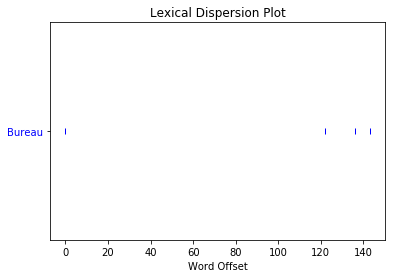

In [78]:
data1.dispersion_plot(["Bureau"])

In [104]:
k=(FreqDist(data1))

In [105]:
r=[]
p=[]
for i,j in k.items():
    r.append(i)
    p.append(j)

In [107]:
df1=pd.DataFrame(r,p)

In [108]:
df1.reset_index(inplace=True)

In [112]:
df1.sort_values('index',ascending=False).head()

,index,0
1,16,of
23,15,.
25,14,the
29,13,and
67,12,(
